# Model Training with Algerian Forest Fire

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
dataset = pd.read_csv('forest_fire_CLEANED.csv')

In [68]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [69]:
dataset['Classes']=np.where(dataset['Classes'].str.contains("not fire"),0,1)

In [70]:
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


In [71]:
dataset['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [72]:
df = dataset

In [73]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [74]:
## Independent And dependent features
X = df.drop('FWI',axis=1)
y = df['FWI']

In [75]:
X.head(1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1


In [76]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=69)

In [77]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [78]:
y_train.shape, y_test.shape

((182,), (61,))

In [79]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657007,-0.266241,-0.384063,0.698219,0.503893,0.405379,0.627056,0.485187,0.519671,0.277703
RH,-0.657007,1.000000,0.264092,0.251594,-0.643864,-0.444880,-0.282308,-0.673699,-0.401651,-0.422845,-0.373689
Ws,-0.266241,0.264092,1.000000,0.173735,-0.145763,0.014186,0.093997,0.027367,0.047130,-0.031856,-0.162785
Rain,-0.384063,0.251594,0.173735,1.000000,-0.569180,-0.296375,-0.308115,-0.362821,-0.310288,-0.405554,-0.061674
FFMC,0.698219,-0.643864,-0.145763,-0.569180,1.000000,0.615747,0.535237,0.749763,0.614556,0.772727,0.199970
DMC,0.503893,-0.444880,0.014186,-0.296375,0.615747,1.000000,0.864814,0.717680,0.981019,0.600101,0.246217
DC,0.405379,-0.282308,0.093997,-0.308115,0.535237,0.864814,1.000000,0.568051,0.933841,0.544001,-0.031569
ISI,0.627056,-0.673699,0.027367,-0.362821,0.749763,0.717680,0.568051,1.000000,0.696689,0.755781,0.250793
BUI,0.485187,-0.401651,0.047130,-0.310288,0.614556,0.981019,0.933841,0.696689,1.000000,0.614324,0.143891
Classes,0.519671,-0.422845,-0.031856,-0.405554,0.772727,0.600101,0.544001,0.755781,0.614324,1.000000,0.124076


In [80]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657007,-0.266241,-0.384063,0.698219,0.503893,0.405379,0.627056,0.485187,0.519671,0.277703
RH,-0.657007,1.000000,0.264092,0.251594,-0.643864,-0.444880,-0.282308,-0.673699,-0.401651,-0.422845,-0.373689
Ws,-0.266241,0.264092,1.000000,0.173735,-0.145763,0.014186,0.093997,0.027367,0.047130,-0.031856,-0.162785
Rain,-0.384063,0.251594,0.173735,1.000000,-0.569180,-0.296375,-0.308115,-0.362821,-0.310288,-0.405554,-0.061674
FFMC,0.698219,-0.643864,-0.145763,-0.569180,1.000000,0.615747,0.535237,0.749763,0.614556,0.772727,0.199970
DMC,0.503893,-0.444880,0.014186,-0.296375,0.615747,1.000000,0.864814,0.717680,0.981019,0.600101,0.246217
DC,0.405379,-0.282308,0.093997,-0.308115,0.535237,0.864814,1.000000,0.568051,0.933841,0.544001,-0.031569
ISI,0.627056,-0.673699,0.027367,-0.362821,0.749763,0.717680,0.568051,1.000000,0.696689,0.755781,0.250793
BUI,0.485187,-0.401651,0.047130,-0.310288,0.614556,0.981019,0.933841,0.696689,1.000000,0.614324,0.143891
Classes,0.519671,-0.422845,-0.031856,-0.405554,0.772727,0.600101,0.544001,0.755781,0.614324,1.000000,0.124076


# Feature Selection

<AxesSubplot: >

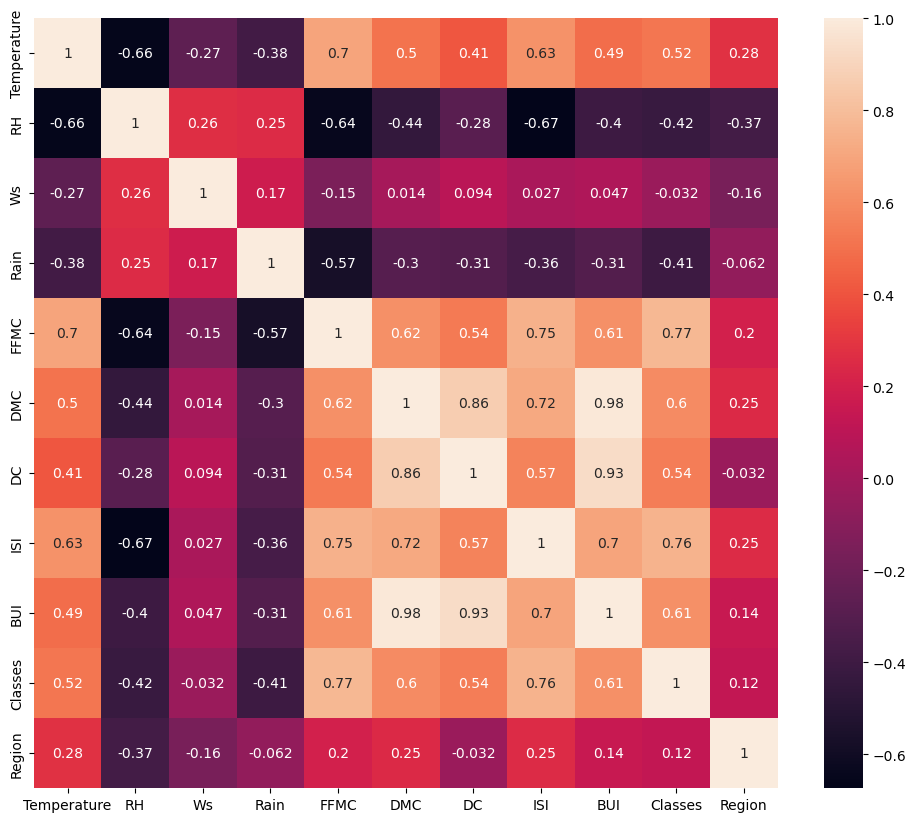

In [81]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [82]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657007,-0.266241,-0.384063,0.698219,0.503893,0.405379,0.627056,0.485187,0.519671,0.277703
RH,-0.657007,1.000000,0.264092,0.251594,-0.643864,-0.444880,-0.282308,-0.673699,-0.401651,-0.422845,-0.373689
Ws,-0.266241,0.264092,1.000000,0.173735,-0.145763,0.014186,0.093997,0.027367,0.047130,-0.031856,-0.162785
Rain,-0.384063,0.251594,0.173735,1.000000,-0.569180,-0.296375,-0.308115,-0.362821,-0.310288,-0.405554,-0.061674
FFMC,0.698219,-0.643864,-0.145763,-0.569180,1.000000,0.615747,0.535237,0.749763,0.614556,0.772727,0.199970
DMC,0.503893,-0.444880,0.014186,-0.296375,0.615747,1.000000,0.864814,0.717680,0.981019,0.600101,0.246217
DC,0.405379,-0.282308,0.093997,-0.308115,0.535237,0.864814,1.000000,0.568051,0.933841,0.544001,-0.031569
ISI,0.627056,-0.673699,0.027367,-0.362821,0.749763,0.717680,0.568051,1.000000,0.696689,0.755781,0.250793
BUI,0.485187,-0.401651,0.047130,-0.310288,0.614556,0.981019,0.933841,0.696689,1.000000,0.614324,0.143891
Classes,0.519671,-0.422845,-0.031856,-0.405554,0.772727,0.600101,0.544001,0.755781,0.614324,1.000000,0.124076


In [83]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [84]:
## threshold--Domain expertise
corr_features=correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

- So we need to drop these correlated features from both train and test dataset
- Collinearity means ki agar jab bhi do independent features similar hota hai ek dusre se tab humko feature ko nahi lene se model prediction me jyada farak nahi padega aur humare model se feature bhi kam ho jayega toh model training aur fast hoga

In [85]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling / Standardization

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_sclaed = scaler.transform(X_test)

## Box Plots To understand Effect Of Standard Scaler

/tmp/ipykernel_91/3129445668.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

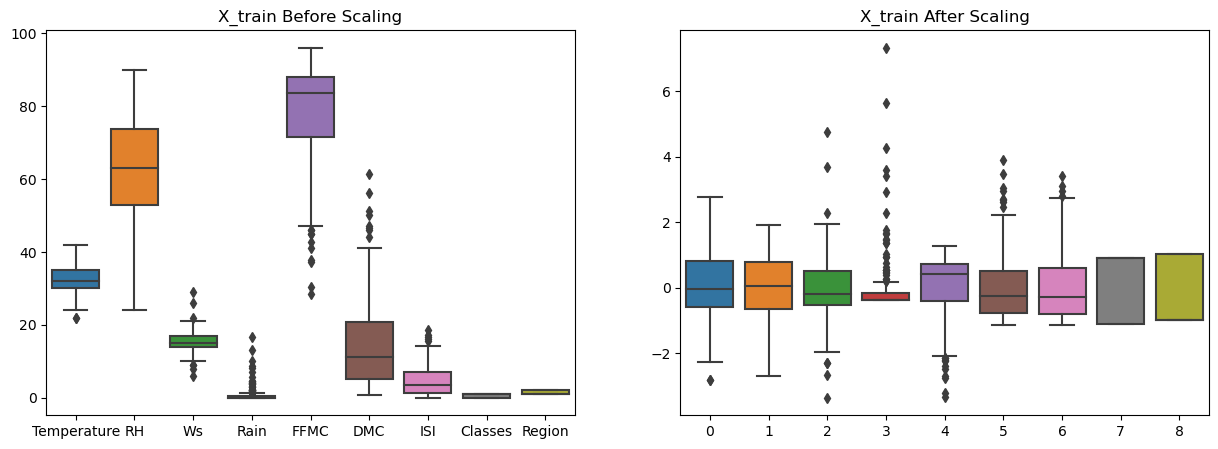

In [87]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train After Scaling')

# Model Training

### Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_sclaed)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R2 : {score}")

MAE: 0.8083051662444797
R2 : 0.9196969045281639


### Lasso Regression

In [89]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lar = Lasso()
lar.fit(X_train_scaled, y_train)
y_pred = lar.predict(X_test_sclaed)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R2 : {score}")

MAE: 1.1772093282336482
R2 : 0.920653081702548


### Ridge Regression

In [90]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

rr = Ridge()
rr.fit(X_train_scaled, y_train)
y_pred = rr.predict(X_test_sclaed)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R2 : {score}")

MAE: 0.8040702002580657
R2 : 0.9223260333326486


### ElasticNet Regression

In [91]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

enr = ElasticNet()
enr.fit(X_train_scaled, y_train)
y_pred = enr.predict(X_test_sclaed)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R2 : {score}")

MAE: 1.7824540896951406
R2 : 0.8888199466310684


# Conclusion :
- Since Ridge Regression gave the highest accuracy so we will choose that regression model to predict future values

In [94]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(rr, open('ridge.pkl','wb'))